In [9]:
import json
import pandas as pd

with open("MC1_graph.json") as f:
    data = json.load(f)

nodes = pd.DataFrame(data["nodes"])


In [10]:
nodes

,Node Type,name,single,release_date,genre,notable,id,written_date,stage_name,notoriety_date
0,Song,Breaking These Chains,True,2017,Oceanus Folk,True,0,NaN,NaN,NaN
1,Person,Carlos Duffy,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,Person,Min Qin,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,Person,Xiuying Xie,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
4,RecordLabel,Nautical Mile Records,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17407,Person,Nate Wild,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN
17408,Person,Scarlett Moon,NaN,NaN,NaN,NaN,17408,NaN,NaN,NaN
17409,Person,Isla Quinn,NaN,NaN,NaN,NaN,17409,NaN,NaN,NaN
17410,Song,Seashell Serenade,True,2030,Oceanus Folk,True,17410,NaN,NaN,2030


In [24]:
import pandas as pd

# Filtra nodos que tienen el campo genre
genre_nodes = nodes[nodes["genre"].notnull()].copy()

# Normaliza capitalización
genre_nodes["genre_clean"] = genre_nodes["genre"].str.strip().str.lower()

# Conteo de géneros originales vs limpios
original_counts = genre_nodes["genre"].value_counts()
clean_counts = genre_nodes["genre_clean"].value_counts()

# Mostrar los 20 géneros originales más comunes (antes de limpiar)
print("🎵 Géneros originales:")
print(original_counts)



🎵 Géneros originales:
genre
Dream Pop                742
Indie Folk               450
Synthwave                382
Doom Metal               348
Oceanus Folk             305
Alternative Rock         258
Southern Gothic Rock     242
Indie Rock               208
Americana                184
Psychedelic Rock         172
Lo-Fi Electronica        136
Indie Pop                134
Jazz Surf Rock           127
Desert Rock              125
Space Rock               121
Blues Rock               109
Darkwave                 104
Speed Metal               84
Emo/Pop Punk              77
Post-Apocalyptic Folk     72
Avant-Garde Folk          70
Symphonic Metal           64
Synthpop                  46
Sea Shanties              21
Acoustic Folk             18
Celtic Folk               12
Name: count, dtype: int64


In [ ]:

print("\nTipos de nodos:")
print(nodes["Node Type"].value_counts())



Tipos de nodos:
Node Type
Person          11361
Song             3615
RecordLabel      1217
Album             996
MusicalGroup      223
Name: count, dtype: int64


In [15]:
import pandas as pd

# Asumiendo que tu DataFrame se llama nodes
# nodes = pd.DataFrame(data["nodes"])  # si aún no lo has cargado

nodes.columns = nodes.columns.str.strip().str.lower().str.replace(" ", "_")

# Función para contar valores no nulos por tipo de nodo
def campos_por_tipo(df):
    tipos = df["node_type"].unique()
    resumen = {}

    for tipo in tipos:
        subset = df[df["node_type"] == tipo]
        non_null_counts = subset.notnull().sum()
        resumen[tipo] = non_null_counts[non_null_counts > 0].sort_values(ascending=False)

    return resumen

# Ejecuta
campos = campos_por_tipo(nodes)

# Mostrar resultados
for tipo, columnas in campos.items():
    print(f"\n Tipo de nodo: {tipo}")
    print(columnas)



 Tipo de nodo: Song
node_type         3615
name              3615
single            3615
release_date      3615
genre             3615
notable           3615
id                3615
written_date      1062
notoriety_date     516
dtype: int64

 Tipo de nodo: Person
node_type     11361
name          11361
id            11361
stage_name      523
dtype: int64

 Tipo de nodo: RecordLabel
node_type    1217
name         1217
id           1217
dtype: int64

 Tipo de nodo: Album
node_type         996
name              996
release_date      996
genre             996
notable           996
id                996
written_date      393
notoriety_date    133
dtype: int64

 Tipo de nodo: MusicalGroup
node_type    223
name         223
id           223
dtype: int64


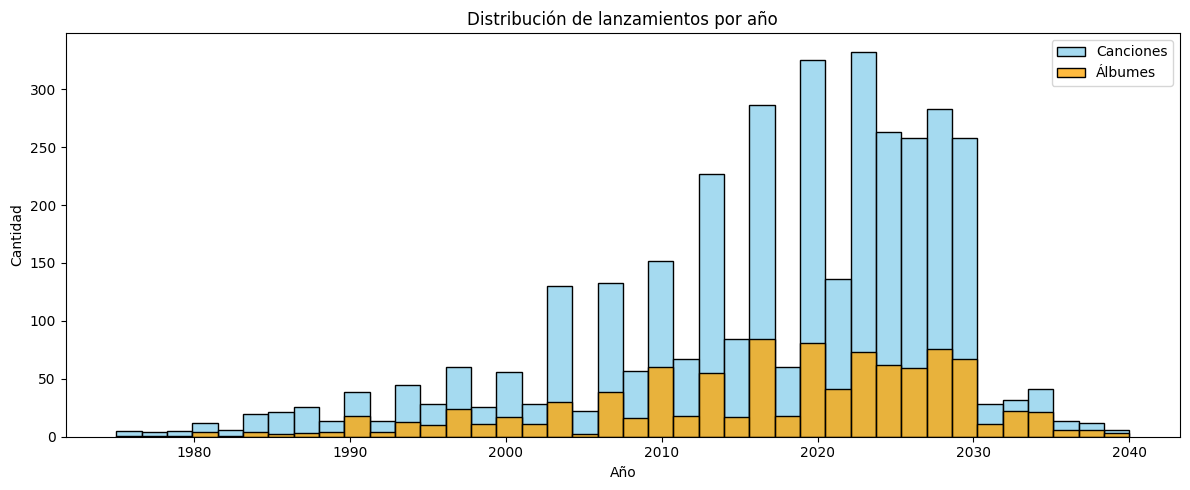

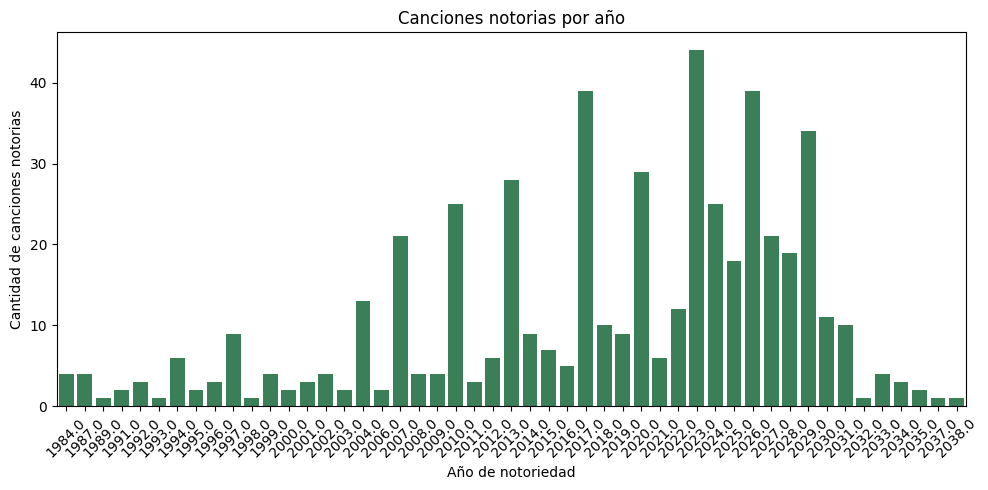


Artistas con nombre artístico (stage_name): 523
                  name          stage_name
27        Anatol Dietz  The Hollow Lantern
129       Kim Gonzalez         Ray Phoenix
140            Min Pan   Oblivion Rhapsody
220          Ewa Zwara          Azure Wind
372            Tao Cui               FL∆ME
383  Mackenzie Compton              Arcana
384   Hannah Wilkinson        Leo Sinclair
468           Tao Dong       Thunder Child
505           Juan Shi               Storm
601       Kayla Taylor          K.O. James

Ejemplo de canciones notorias con género y notoriedad:
                                name                  genre  release_date  \
92          Synth-Pop Tanz Explosion              Americana          2023   
139  Whispers from the Rocking Chair            Speed Metal          2023   
210                    Luminous Path               Darkwave          2029   
283                 Unbreakable Bond              Dream Pop          2029   
358                  Endless Horizon 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar por tipo
songs = nodes[nodes["node_type"] == "Song"].copy()
albums = nodes[nodes["node_type"] == "Album"].copy()
persons = nodes[nodes["node_type"] == "Person"].copy()

# Convertir fechas a numéricas
songs["release_date"] = pd.to_numeric(songs["release_date"], errors="coerce")
albums["release_date"] = pd.to_numeric(albums["release_date"], errors="coerce")
songs["notoriety_date"] = pd.to_numeric(songs["notoriety_date"], errors="coerce")

# 1. Histograma de años de lanzamiento (canciones y álbumes)
plt.figure(figsize=(12, 5))
sns.histplot(songs["release_date"].dropna(), bins=40, color="skyblue", label="Canciones", kde=False)
sns.histplot(albums["release_date"].dropna(), bins=40, color="orange", label="Álbumes", kde=False)
plt.title("Distribución de lanzamientos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Canciones notorias vs no notorias por año
notoriety_by_year = songs.dropna(subset=["notoriety_date"])
plt.figure(figsize=(10, 5))
sns.countplot(x="notoriety_date", data=notoriety_by_year, color="seagreen")
plt.title("Canciones notorias por año")
plt.xticks(rotation=45)
plt.xlabel("Año de notoriedad")
plt.ylabel("Cantidad de canciones notorias")
plt.tight_layout()
plt.show()

# 3. Artistas con stage_name y notoriedad (potenciales artistas clave)
persons_with_stage = persons.dropna(subset=["stage_name"])
print("\nArtistas con nombre artístico (stage_name):", len(persons_with_stage))
print(persons_with_stage[["name", "stage_name"]].head(10))

# 4. Canciones notorias con metadatos completos
notorious_songs = songs[songs["notable"] == True].dropna(subset=["notoriety_date", "genre"])
print("\nEjemplo de canciones notorias con género y notoriedad:")
print(notorious_songs[["name", "genre", "release_date", "notoriety_date"]].head())


🎯 Conteo de relaciones por tipo (edge_type):
edge_type
PerformerOf           13587
RecordedBy             3798
ComposerOf             3290
ProducerOf             3209
DistributedBy          3013
LyricistOf             2985
InStyleOf              2289
InterpolatesFrom       1574
LyricalReferenceTo     1496
CoverOf                1429
DirectlySamples         619
MemberOf                568
Name: count, dtype: int64


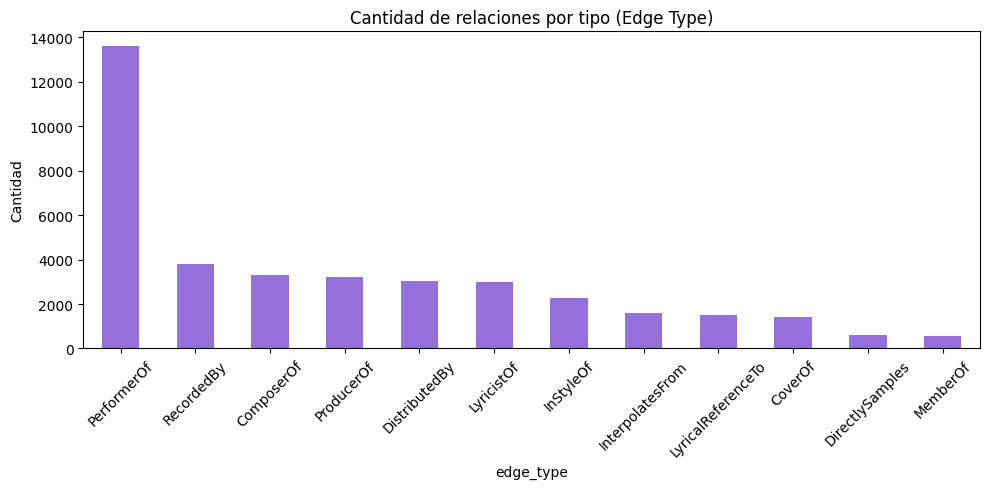

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

links.columns = links.columns.str.strip().str.lower().str.replace(" ", "_")

edge_counts = links["edge_type"].value_counts()

print("🎯 Conteo de relaciones por tipo (edge_type):")
print(edge_counts)

plt.figure(figsize=(10, 5))
edge_counts.plot(kind="bar", color="mediumpurple")
plt.title("Cantidad de relaciones por tipo (Edge Type)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
